In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/01Training/Data/Data/Player Totals.csv')

In [4]:
data.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,30458,2023,5025,A.J. Green,NaN,SG,23.0,1,NBA,MIL,...,1.000,4.0,22.0,26.0,11,5.0,0.0,7.0,23,106
1,30459,2023,5026,A.J. Lawson,NaN,SG,22.0,1,NBA,TOT,...,0.333,0.0,4.0,4.0,1,0.0,0.0,0.0,3,16
2,30460,2023,5026,A.J. Lawson,NaN,SG,22.0,1,NBA,MIN,...,NaN,0.0,1.0,1.0,0,0.0,0.0,0.0,1,2
3,30461,2023,5026,A.J. Lawson,NaN,SG,22.0,1,NBA,DAL,...,0.333,0.0,3.0,3.0,1,0.0,0.0,0.0,2,14
4,30462,2023,4219,Aaron Gordon,NaN,PF,27.0,9,NBA,DEN,...,0.618,113.0,201.0,314.0,125,35.0,35.0,74.0,88,772


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30965 entries, 0 to 30964
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   seas_id       30965 non-null  int64  
 1   season        30965 non-null  int64  
 2   player_id     30965 non-null  int64  
 3   player        30965 non-null  object 
 4   birth_year    2868 non-null   float64
 5   pos           30965 non-null  object 
 6   age           30943 non-null  float64
 7   experience    30965 non-null  int64  
 8   lg            30965 non-null  object 
 9   tm            30965 non-null  object 
 10  g             30965 non-null  int64  
 11  gs            22328 non-null  float64
 12  mp            29882 non-null  float64
 13  fg            30965 non-null  int64  
 14  fga           30965 non-null  int64  
 15  fg_percent    30815 non-null  float64
 16  x3p           24613 non-null  float64
 17  x3pa          24613 non-null  float64
 18  x3p_percent   20479 non-nu

In [6]:
data.describe()

,seas_id,season,player_id,birth_year,age,experience,g,gs,mp,fg,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,30965.000000,30965.000000,30965.000000,2868.000000,30943.000000,30965.000000,30965.000000,22328.000000,29882.000000,30965.000000,...,29731.000000,26308.000000,26308.000000,30071.000000,30965.000000,25339.000000,25340.000000,25330.000000,30965.000000,30965.000000
mean,15483.000000,1994.207944,2593.108316,1944.100418,26.492001,4.949136,48.843565,22.568121,1166.391640,188.488875,...,0.720974,60.164247,145.475521,218.301287,109.580171,38.149927,23.460379,71.508527,110.874374,494.074116
std,8938.969879,20.117063,1273.780544,15.094113,3.831353,3.711172,26.590821,27.902463,928.374251,184.872882,...,0.143342,67.859260,146.786588,225.450589,131.192532,37.674597,35.549036,67.696686,83.878499,485.763443
min,1.000000,1947.000000,1.000000,1914.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7742.000000,1979.000000,1593.000000,1938.000000,24.000000,2.000000,25.000000,0.000000,315.000000,38.000000,...,0.658000,11.000000,32.000000,49.000000,18.000000,8.000000,3.000000,16.000000,35.000000,100.000000
50%,15483.000000,1997.000000,2681.000000,1946.000000,26.000000,4.000000,54.000000,7.000000,995.000000,133.000000,...,0.745000,35.000000,104.000000,153.000000,64.000000,28.000000,11.000000,52.000000,100.000000,346.000000
75%,23224.000000,2011.000000,3627.000000,1951.000000,29.000000,7.000000,74.000000,42.000000,1892.000000,287.000000,...,0.811000,86.000000,210.000000,310.000000,152.000000,57.000000,28.000000,108.000000,174.000000,753.000000
max,30965.000000,2023.000000,5096.000000,2002.000000,46.000000,22.000000,90.000000,83.000000,3882.000000,1597.000000,...,1.000000,587.000000,1111.000000,2149.000000,1164.000000,346.000000,456.000000,464.000000,386.000000,4029.000000


In [7]:
del data['lg']

In [8]:
del data['birth_year']

In [9]:
nba_advanced = pd.read_csv('/content/drive/MyDrive/01Training/Data/Data/Advanced.csv')

In [10]:
nba_advanced = nba_advanced[['player', 'tm','player_id', 'ws', 'per', 'vorp', 'season']]

In [11]:
nba_advanced.head()

,player,tm,player_id,ws,per,vorp,season
0,A.J. Green,MIL,5025,0.5,12.2,0.1,2023
1,A.J. Lawson,TOT,5026,0.0,14.9,0.0,2023
2,A.J. Lawson,MIN,5026,0.0,34.9,0.0,2023
3,A.J. Lawson,DAL,5026,0.0,13.3,0.0,2023
4,Aaron Gordon,DEN,4219,4.8,20.1,1.5,2023


In [12]:
nba_advanced.describe()

,player_id,ws,per,vorp,season
count,30965.000000,30954.000000,29865.000000,25318.000000,30965.000000
mean,2593.108316,2.377269,12.482247,0.545351,1994.207944
std,1273.780544,2.974201,6.270530,1.257575,20.117063
min,1.000000,-2.800000,-90.600000,-2.600000,1947.000000
25%,1593.000000,0.200000,9.700000,-0.100000,1979.000000
50%,2681.000000,1.300000,12.700000,0.100000,1997.000000
75%,3627.000000,3.600000,15.700000,0.800000,2011.000000
max,5096.000000,25.400000,133.800000,12.500000,2023.000000


In [13]:
data.reset_index()
nba_advanced.reset_index()

,index,player,tm,player_id,ws,per,vorp,season
0,0,A.J. Green,MIL,5025,0.5,12.2,0.1,2023
1,1,A.J. Lawson,TOT,5026,0.0,14.9,0.0,2023
2,2,A.J. Lawson,MIN,5026,0.0,34.9,0.0,2023
3,3,A.J. Lawson,DAL,5026,0.0,13.3,0.0,2023
4,4,Aaron Gordon,DEN,4219,4.8,20.1,1.5,2023
...,...,...,...,...,...,...,...,...
30960,30960,Walt Miller,PIT,157,0.3,NaN,NaN,1947
30961,30961,Warren Fenley,BOS,158,-0.1,NaN,NaN,1947
30962,30962,Wilbert Kautz,CHS,159,0.8,NaN,NaN,1947
30963,30963,Woody Grimshaw,PRO,160,0.6,NaN,NaN,1947


In [14]:
data = pd.merge(data, nba_advanced, how = 'left', on = ['player', 'season'])

In [15]:
data = data.drop_duplicates()

In [16]:
data.describe()

,seas_id,season,player_id_x,age,experience,g,gs,mp,fg,fga,...,ast,stl,blk,tov,pf,pts,player_id_y,ws,per,vorp
count,48947.000000,48947.000000,48947.000000,48913.000000,48947.000000,48947.000000,35026.000000,46946.000000,48947.000000,48947.000000,...,48947.000000,39761.000000,39762.000000,40168.000000,48947.000000,48947.000000,48947.000000,48920.000000,46908.000000,39738.000000
mean,15548.869880,1994.241833,2593.365743,26.605217,4.989356,42.810877,18.207046,987.242364,156.641347,350.512963,...,91.437943,31.952793,19.323626,60.578296,95.139375,410.807853,2593.365743,1.873424,11.980848,0.390601
std,9033.423769,20.436281,1284.352641,3.726537,3.643631,26.493686,25.211905,873.345689,168.183265,359.334816,...,117.778202,34.311342,31.516187,62.543748,79.906382,441.503417,1284.352641,2.623696,6.351577,1.078812
min,1.000000,1947.000000,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.800000,-90.600000,-2.600000
25%,7581.000000,1978.000000,1556.000000,24.000000,2.000000,19.000000,0.000000,224.000000,27.000000,66.500000,...,13.000000,6.000000,2.000000,12.000000,25.000000,70.000000,1556.000000,0.100000,9.300000,-0.100000
50%,15640.000000,1997.000000,2710.000000,26.000000,4.000000,42.000000,4.000000,738.000000,98.000000,230.000000,...,49.000000,21.000000,8.000000,40.000000,76.000000,256.000000,2710.000000,0.900000,12.300000,0.000000
75%,23349.000000,2011.000000,3674.000000,29.000000,7.000000,68.000000,28.000000,1595.000000,234.000000,530.000000,...,123.000000,47.000000,23.000000,90.000000,150.000000,610.000000,3674.000000,2.700000,15.200000,0.500000
max,30965.000000,2023.000000,5096.000000,46.000000,22.000000,90.000000,83.000000,3882.000000,1597.000000,3159.000000,...,1164.000000,346.000000,456.000000,464.000000,386.000000,4029.000000,5096.000000,25.400000,133.800000,12.500000


(array([3.0543e+04, 1.0141e+04, 4.8780e+03, 2.2250e+03, 8.7100e+02,
        2.3600e+02, 4.4000e+01, 7.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   0. ,  402.9,  805.8, 1208.7, 1611.6, 2014.5, 2417.4, 2820.3,
        3223.2, 3626.1, 4029. ]),
 <BarContainer object of 10 artists>)

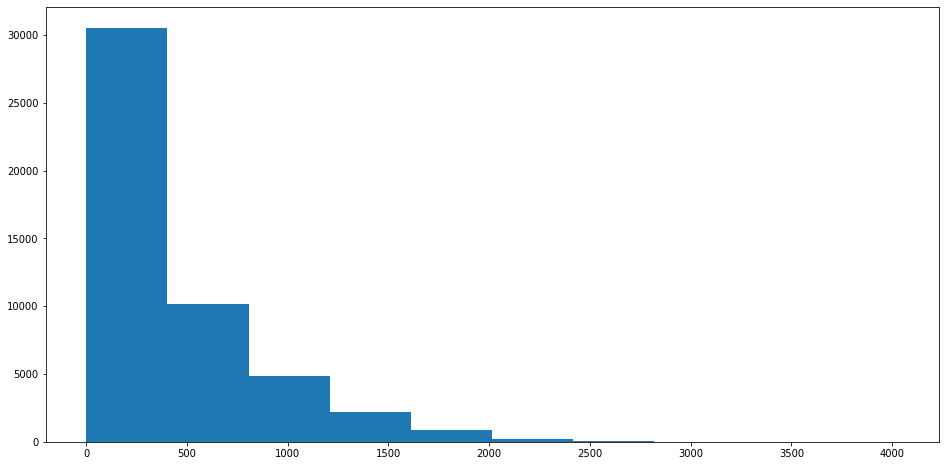

In [17]:
plt.figure(figsize = (16,8))
plt.hist(data['pts'])

In [18]:
data.value_counts(data['pos'])

pos
PF          9649
SG          9435
C           9096
PG          9088
SF          8759
G            492
F            422
F-C          304
G-F          275
F-G          245
C-F          215
SF-SG        134
SG-PG        131
C-PF         128
PG-SG        127
PF-C         122
PF-SF        111
SG-SF        110
SF-PF         76
SG-PF         12
SG-PG-SF       4
PG-SF          3
SF-C           3
SF-PG          3
C-SF           3
dtype: int64

In [19]:
corr = data.corr()

<AxesSubplot:>

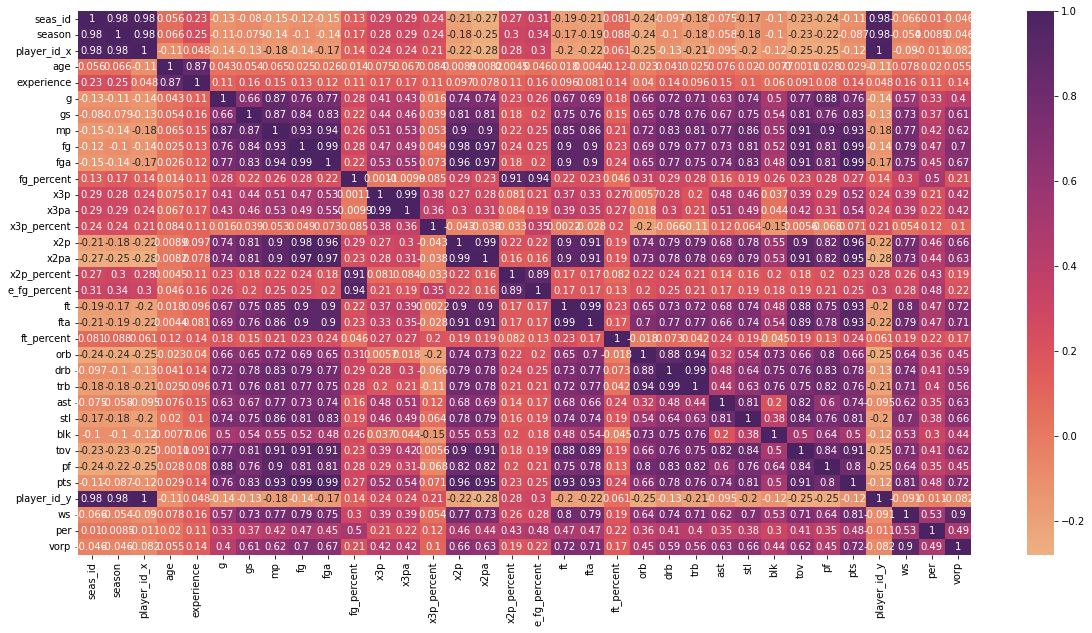

In [20]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(corr, annot = True, cmap = 'flare')

In [21]:
data = data[(data['mp'] > 738) & (data['g'] > 42) & (data['season'] >= 1990) & (data['season'] <= 1999)]

In [22]:
print(data)

       seas_id  season  player_id_x           player pos   age  experience  \
22854    16207    1999         2218       A.C. Green  PF  35.0          14   
22855    16208    1999         2832      Aaron McKie  SG  26.0           5   
22862    16215    1999         2763    Allan Houston  SG  27.0           6   
22863    16216    1999         2967    Allen Iverson  SG  23.0           3   
22864    16217    1999         2696  Alonzo Mourning   C  28.0           7   
...        ...     ...          ...              ...  ..   ...         ...   
30300    12255    1990         2401  Winston Garland  PG  25.0           3   
30301    12256    1990         2401  Winston Garland  PG  25.0           3   
30302    12256    1990         2401  Winston Garland  PG  25.0           3   
30303    12256    1990         2401  Winston Garland  PG  25.0           3   
30307    12258    1990         2278  Xavier McDaniel  SF  26.0           5   

      tm_x   g    gs  ...    stl    blk    tov   pf   pts  tm_y

In [23]:
data.dropna

<bound method DataFrame.dropna of        seas_id  season  player_id_x           player pos   age  experience  \
22854    16207    1999         2218       A.C. Green  PF  35.0          14   
22855    16208    1999         2832      Aaron McKie  SG  26.0           5   
22862    16215    1999         2763    Allan Houston  SG  27.0           6   
22863    16216    1999         2967    Allen Iverson  SG  23.0           3   
22864    16217    1999         2696  Alonzo Mourning   C  28.0           7   
...        ...     ...          ...              ...  ..   ...         ...   
30300    12255    1990         2401  Winston Garland  PG  25.0           3   
30301    12256    1990         2401  Winston Garland  PG  25.0           3   
30302    12256    1990         2401  Winston Garland  PG  25.0           3   
30303    12256    1990         2401  Winston Garland  PG  25.0           3   
30307    12258    1990         2278  Xavier McDaniel  SF  26.0           5   

      tm_x   g    gs  ...    

In [24]:
data.head(10)

,seas_id,season,player_id_x,player,pos,age,experience,tm_x,g,gs,...,stl,blk,tov,pf,pts,tm_y,player_id_y,ws,per,vorp
22854,16207,1999,2218,A.C. Green,PF,35.0,14,DAL,50,35.0,...,28.0,8.0,19.0,69,246,DAL,2218,1.4,12.5,0.0
22855,16208,1999,2832,Aaron McKie,SG,26.0,5,PHI,50,4.0,...,63.0,3.0,57.0,90,240,PHI,2832,1.6,11.4,0.4
22862,16215,1999,2763,Allan Houston,SG,27.0,6,NYK,50,50.0,...,35.0,9.0,130.0,115,813,NYK,2763,2.9,13.1,0.6
22863,16216,1999,2967,Allen Iverson,SG,23.0,3,PHI,48,48.0,...,110.0,7.0,167.0,98,1284,PHI,2967,7.2,22.2,3.9
22864,16217,1999,2696,Alonzo Mourning,C,28.0,7,MIA,46,46.0,...,34.0,180.0,139.0,161,924,MIA,2696,7.9,24.6,3.0
22866,16219,1999,3036,Alvin Williams,PG,24.0,2,TOR,50,45.0,...,51.0,12.0,56.0,94,248,TOR,3036,1.2,10.4,-0.1
22868,16221,1999,2894,Andrew DeClercq,C,25.0,4,TOT,47,32.0,...,50.0,29.0,54.0,161,371,TOT,2894,3.1,15.0,0.2
22869,16221,1999,2894,Andrew DeClercq,C,25.0,4,TOT,47,32.0,...,50.0,29.0,54.0,161,371,BOS,2894,0.5,12.2,-0.1
22870,16221,1999,2894,Andrew DeClercq,C,25.0,4,TOT,47,32.0,...,50.0,29.0,54.0,161,371,CLE,2894,2.7,15.8,0.4
22879,16226,1999,2767,Anfernee Hardaway,SG,27.0,6,ORL,50,50.0,...,111.0,23.0,150.0,111,791,ORL,2767,5.0,16.7,2.3


In [25]:
data.columns

Index(['seas_id', 'season', 'player_id_x', 'player', 'pos', 'age',
       'experience', 'tm_x', 'g', 'gs', 'mp', 'fg', 'fga', 'fg_percent', 'x3p',
       'x3pa', 'x3p_percent', 'x2p', 'x2pa', 'x2p_percent', 'e_fg_percent',
       'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'pts', 'tm_y', 'player_id_y', 'ws', 'per', 'vorp'],
      dtype='object')

In [26]:
data['pos'].value_counts()

PG       689
PF       687
SF       628
SG       609
C        580
SG-SF     12
PF-SF      4
SF-SG      3
Name: pos, dtype: int64

In [27]:
data['pos'] = data['pos'].map({'PG':1, 
                               'SG':2,
                               'SF':3,
                               'PF':4,
                               'C':5,
                               'SF-SG':6,
                               'SG-PG':7,
                               'PF-SF':8,
                               'PF-C':9,
                               'SG-SF':10,
                               'PG-SG':11,
                               'SF-PF':12,
                               'C-PF': 13,
                               'SG-PG-SF':14
                               })

In [28]:
data.isna().sum()

seas_id           0
season            0
player_id_x       0
player            0
pos               0
age               0
experience        0
tm_x              0
g                 0
gs                0
mp                0
fg                0
fga               0
fg_percent        0
x3p               0
x3pa              0
x3p_percent     233
x2p               0
x2pa              0
x2p_percent       0
e_fg_percent      0
ft                0
fta               0
ft_percent        0
orb               0
drb               0
trb               0
ast               0
stl               0
blk               0
tov               0
pf                0
pts               0
tm_y              0
player_id_y       0
ws                0
per               0
vorp              0
dtype: int64

In [29]:
data['x3p_percent'] = data['x3p_percent'].fillna(0)

In [30]:
data.isnull().sum()

seas_id         0
season          0
player_id_x     0
player          0
pos             0
age             0
experience      0
tm_x            0
g               0
gs              0
mp              0
fg              0
fga             0
fg_percent      0
x3p             0
x3pa            0
x3p_percent     0
x2p             0
x2pa            0
x2p_percent     0
e_fg_percent    0
ft              0
fta             0
ft_percent      0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
tm_y            0
player_id_y     0
ws              0
per             0
vorp            0
dtype: int64

Text(0.5, 1.0, "NBA: 1990's Scoring")

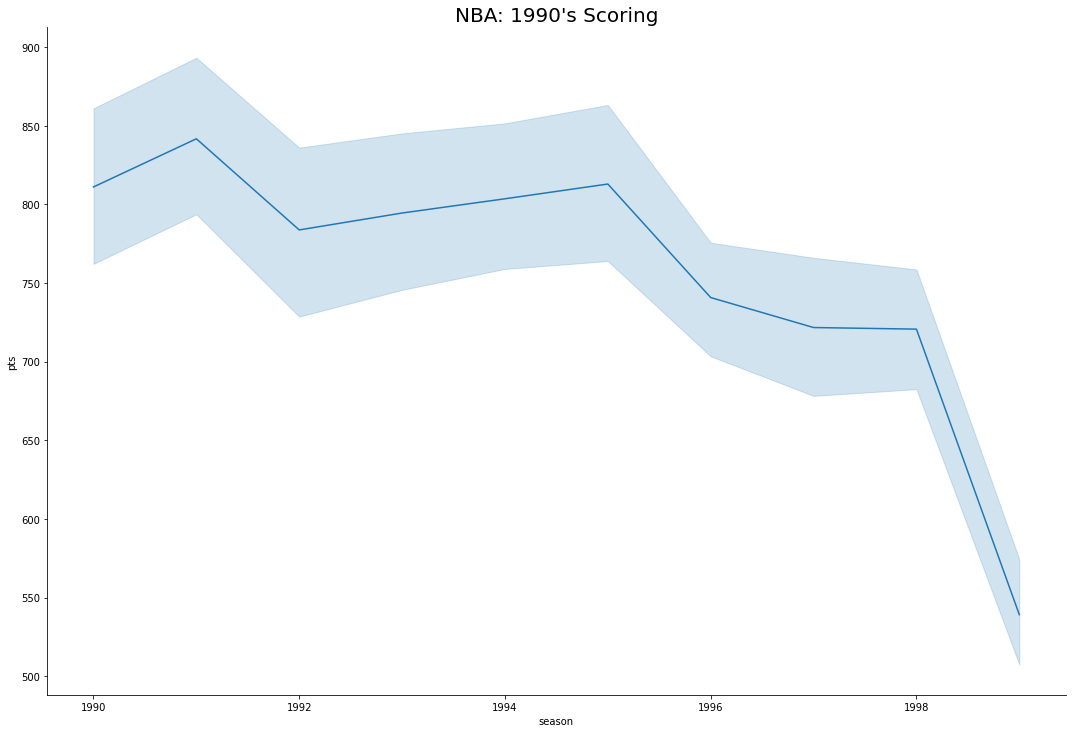

In [31]:
fig
sns.relplot(data = data, x= 'season', y = 'pts', kind = 'line', height = 10, aspect = 1.5)
plt.title("NBA: 1990's Scoring", fontsize = 20)

In [32]:
fig = px.bar(data_frame = data, x= 'season', y= 'pts', color = 'pts',  width=1300, height=700)
fig.show()

Text(0.5, 1.0, "NBA: 1990's Player Efficiency")

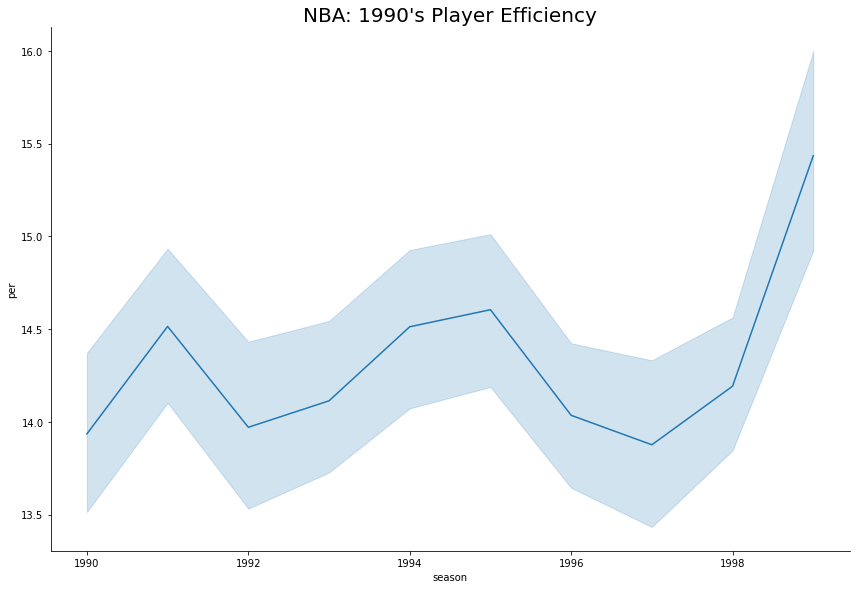

In [33]:
sns.relplot(data = data, x= 'season', y = 'per', kind = 'line', height = 8, aspect = 1.5)
plt.title("NBA: 1990's Player Efficiency", fontsize = 20)

In [34]:
fig = px.bar(data_frame = data, x= 'season', y= 'per', color = 'per', width = 1300, height = 700)
fig.show()

Text(0.5, 1.0, "NBA: 1990's 3-Pointers (by Player)")

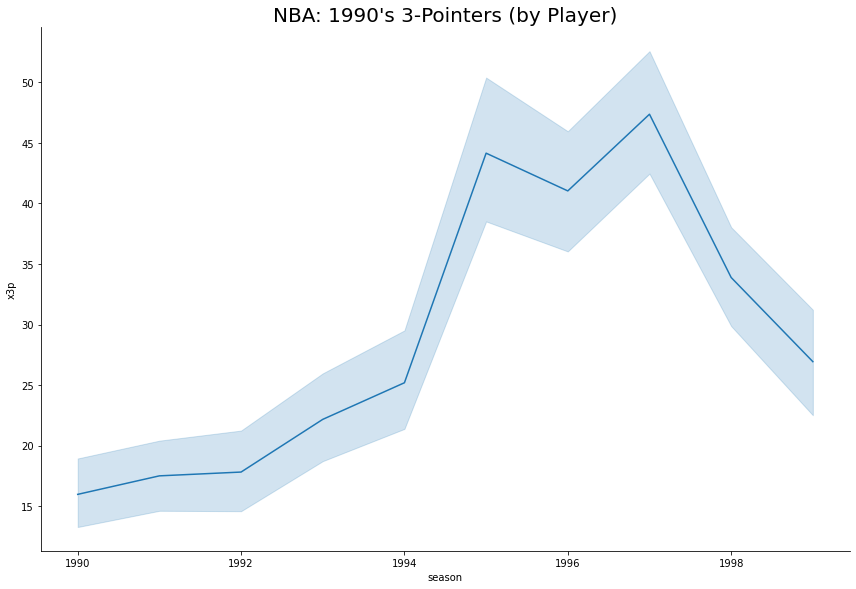

In [35]:
fig
sns.relplot(data = data, x= 'season', y = 'x3p', kind = 'line', height = 8, aspect = 1.5)
plt.title("NBA: 1990's 3-Pointers (by Player)", fontsize = 20)

In [36]:
fig = px.bar(data_frame = data, x= 'season', y= 'x3p', color = 'x3p', width = 1300, height = 700)
fig.show()

In [37]:
nineties_3pt = data['x3p'].sum()
print(int(nineties_3pt), "total 3-Pointers were made in the 1990's.")

96070 total 3-Pointers were made in the 1990's.
